In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns


**1. Data Preprocessing**

In [62]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Training/Python/Pandas/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
display(df.tail())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
# Data Shape
print("Data Shape:", df.shape)

# Data Types
print("\nData Types:")
print(df.dtypes)

Data Shape: (1000, 8)

Data Types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [8]:
# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:")
print(missing_values)
print("\nPercentage of Missing Values:")
print(missing_percentage)


Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Percentage of Missing Values:
gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


**Findings: There is no missing value and no data inconsistencies**

In [10]:
numerical_cols = df.select_dtypes(include=['number'])
numerical_cols.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [12]:
obj_col=df.select_dtypes(include=['object'])
obj_col.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [14]:
categorical_cols = df.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    #print(f"\nValue Counts for {col}:")
    #print(df[col].value_counts())
    print(f"\nUnique values for {col}:")
    print(df[col].unique())


Unique values for gender:
['female' 'male']

Unique values for race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']

Unique values for parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values for lunch:
['standard' 'free/reduced']

Unique values for test preparation course:
['none' 'completed']


<Axes: >

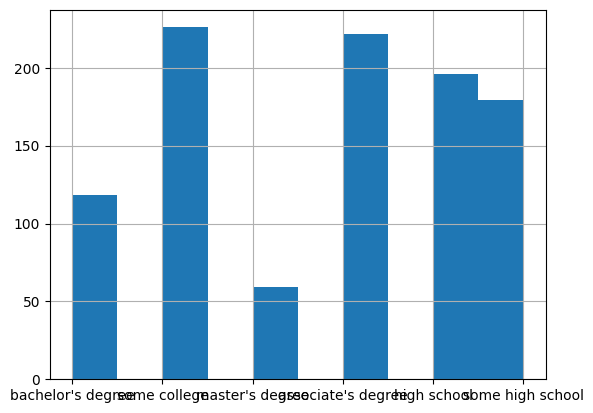

In [17]:
#histogram of parental level of education columns
df['parental level of education'].hist()

In [19]:
df['parental level of education'].isnull().sum()

np.int64(0)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
numerical_cols = df.select_dtypes(include=['number'])
print("Descriptive Statistics for Numerical Columns:")
display(numerical_cols.describe())

Descriptive Statistics for Numerical Columns:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



Value Counts for gender:
gender
female    518
male      482
Name: count, dtype: int64


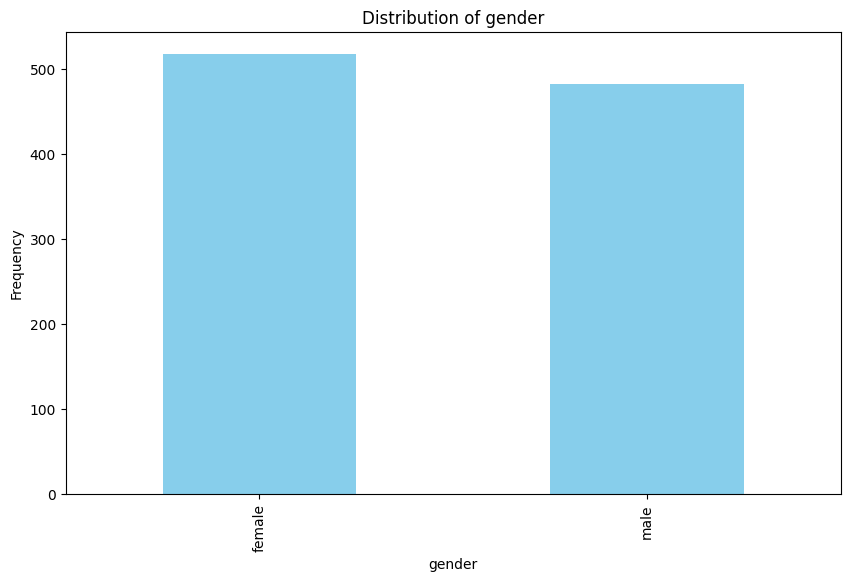


Value Counts for race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


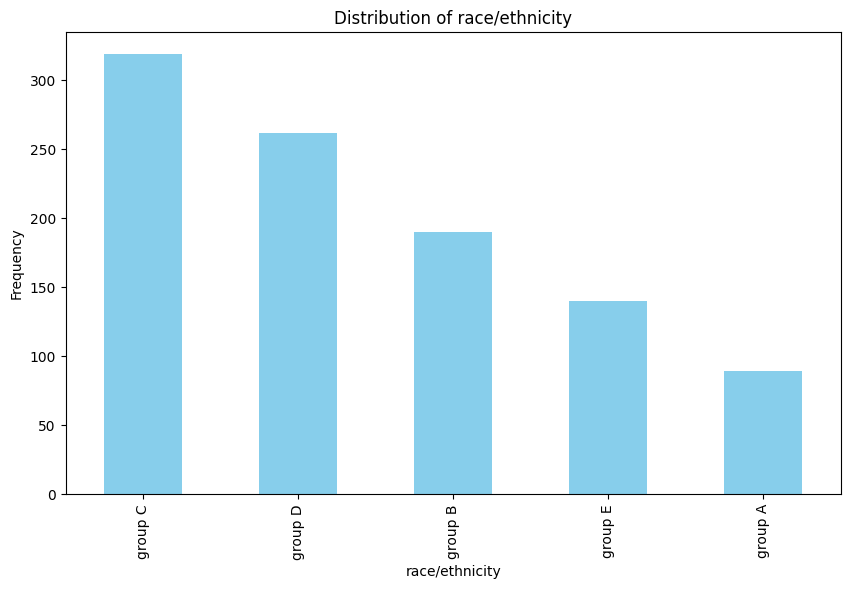


Value Counts for parental level of education:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


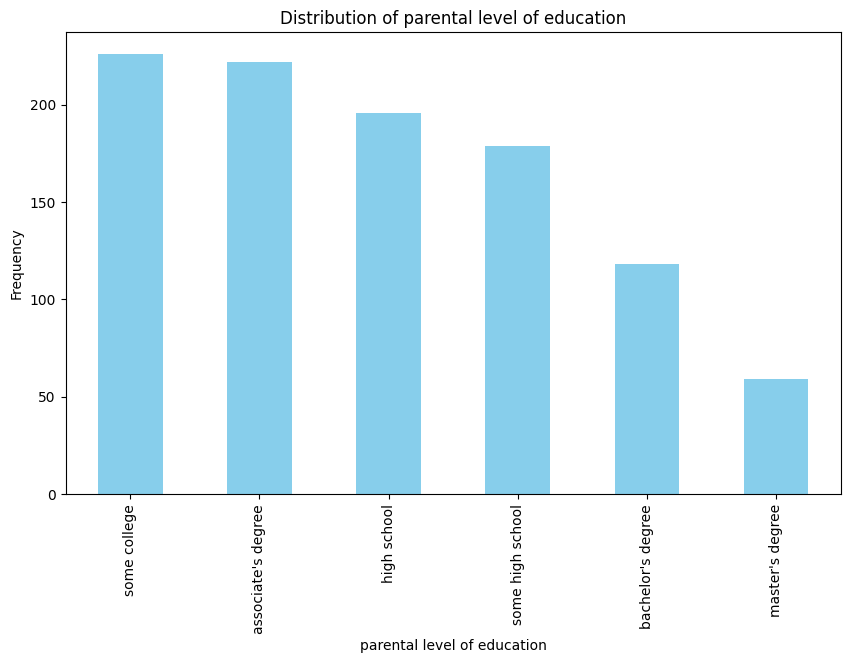


Value Counts for lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64


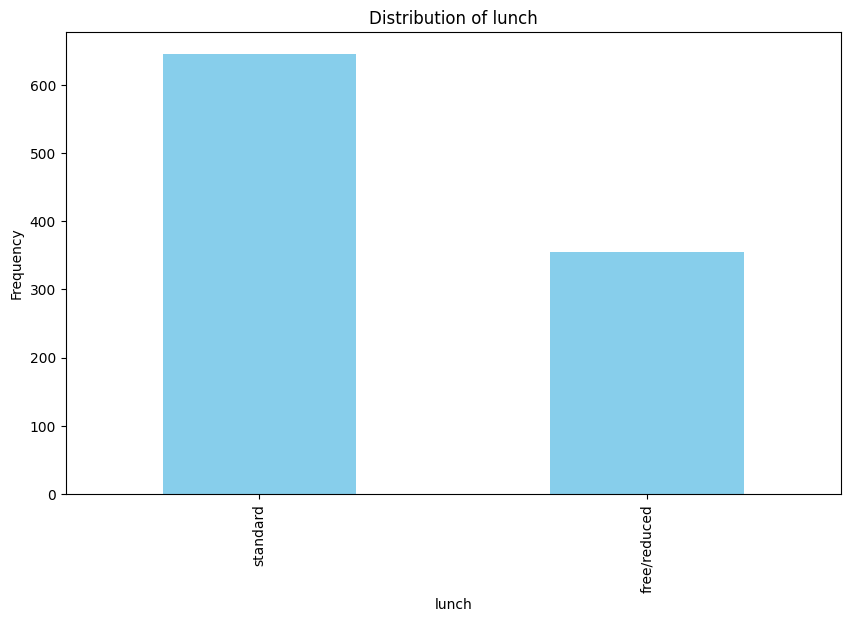


Value Counts for test preparation course:
test preparation course
none         642
completed    358
Name: count, dtype: int64


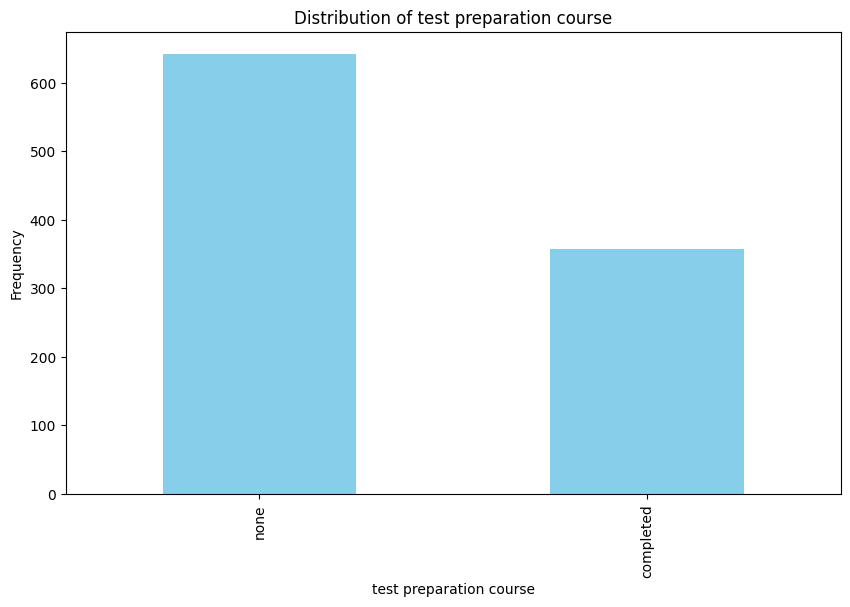

In [21]:
# 2. Categorical Analysis
categorical_cols = df.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(10, 6))  # Adjust figure size
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

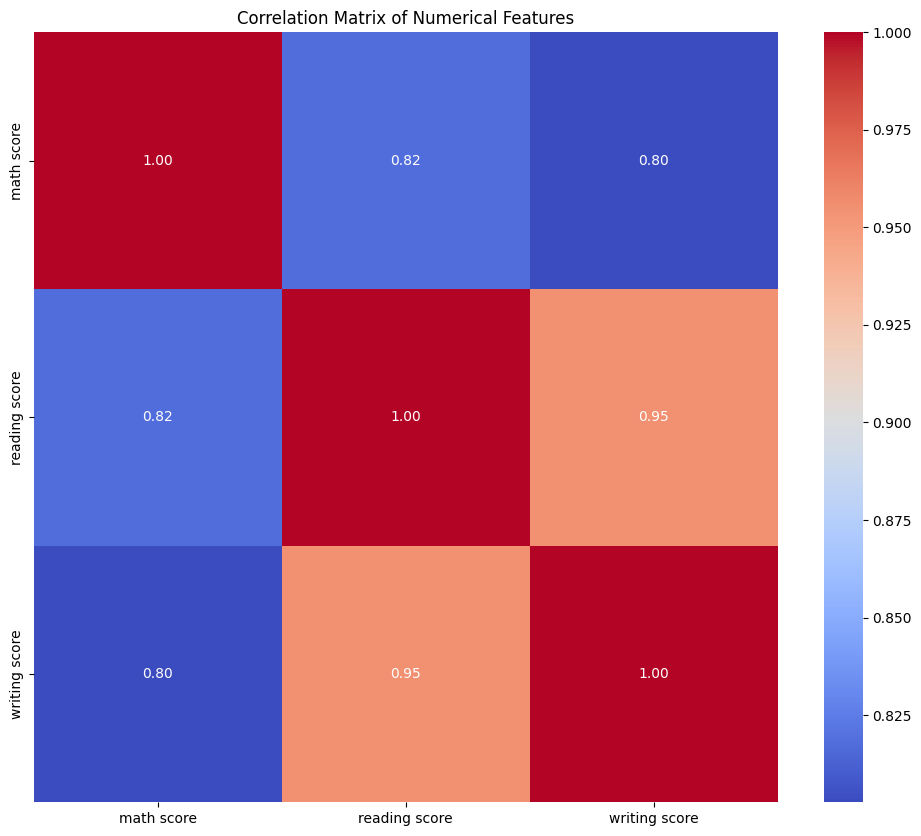

In [22]:
# 3. Correlation Analysis
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Outlier detection**

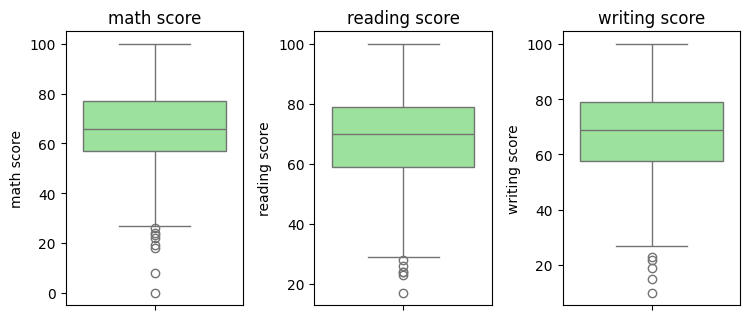

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Outlier Detection
plt.figure(figsize=(25, 15))
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(5, 10, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

In [27]:
#outlier handling: capping 'writing score' outliers
# (Expand this section for other outliers)
import numpy as np
upper_limit = df['writing score'].quantile(0.95)
df['writing score'] = np.where(df['writing score'] > upper_limit, upper_limit, df['writing score'])



**Encode categorical variables using one-hot encoding or label encoding.**

In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Print the column names to verify
print(df.columns)

print(f"Original Employee Data:\n{df}\n")

df_pandas_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] , drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")


encoder = OneHotEncoder(sparse_output=False)
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded,
                          columns=encoder.get_feature_names_out(categorical_columns))

df_sklearn_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

print(f"One-Hot Encoded Data using Scikit-Learn:\n{df_sklearn_encoded}\n")

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
Original Employee Data:
     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard 

**Standarization**

**Data Scaling - Feature Engineering and Model Training Part**

In [67]:
X = df_sklearn_encoded

print("Shape of X:", X.shape)
print("\nFirst 5 rows of X:")
print(X.head())

Shape of X: (1000, 20)

First 5 rows of X:
   math score  reading score  writing score  gender_female  gender_male  \
0          72             72           74.0            1.0          0.0   
1          69             90           88.0            1.0          0.0   
2          90             95           92.0            1.0          0.0   
3          47             57           44.0            0.0          1.0   
4          76             78           75.0            0.0          1.0   

   race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  \
0                     0.0                     1.0                     0.0   
1                     0.0                     0.0                     1.0   
2                     0.0                     1.0                     0.0   
3                     1.0                     0.0                     0.0   
4                     0.0                     0.0                     1.0   

   race/ethnicity_group D  race/ethnicity_g

Shape of X: (1000, 20)

First 5 rows of X:
   math score  reading score  writing score  gender_female  gender_male  \
0          72             72           74.0            1.0          0.0   
1          69             90           88.0            1.0          0.0   
2          90             95           92.0            1.0          0.0   
3          47             57           44.0            0.0          1.0   
4          76             78           75.0            0.0          1.0   

   race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  \
0                     0.0                     1.0                     0.0   
1                     0.0                     0.0                     1.0   
2                     0.0                     1.0                     0.0   
3                     1.0                     0.0                     0.0   
4                     0.0                     0.0                     1.0   

   race/ethnicity_group D  race/ethnicity_g

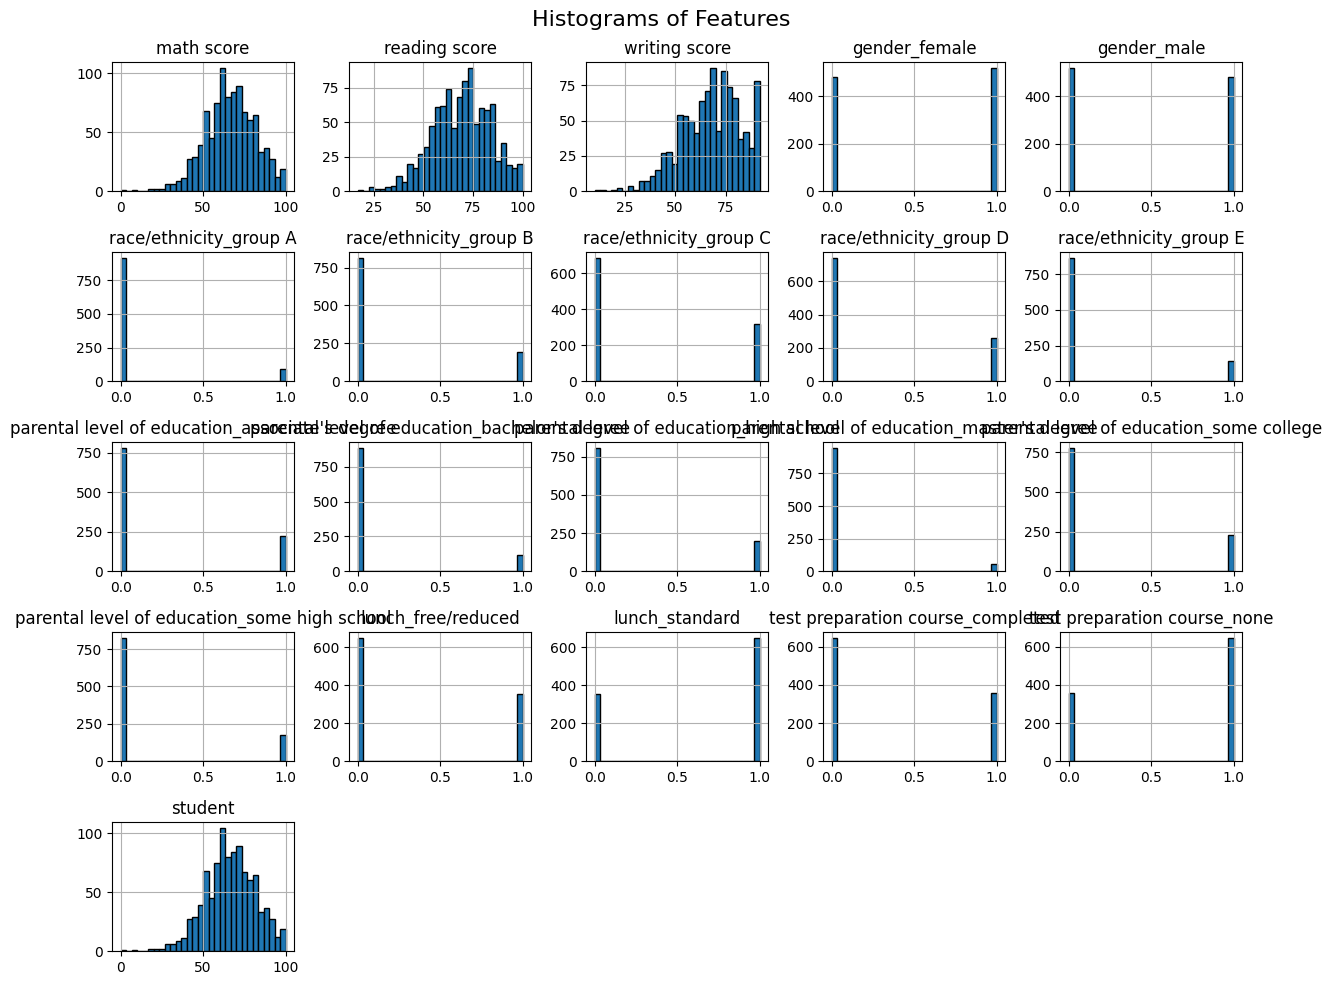

In [70]:
# Define the target variable (assuming 'math score' is the target)
y = df_sklearn_encoded['math score']

# Now proceed with creating the data DataFrame and adding the target variable
X = df_sklearn_encoded

print("Shape of X:", X.shape)
print("\nFirst 5 rows of X:")
print(X.head())

data = X.copy()
data['student'] = y

print("\n📈 Plotting histograms of all features...")
data.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout()
plt.show()


🧠 Showing correlation heatmap:


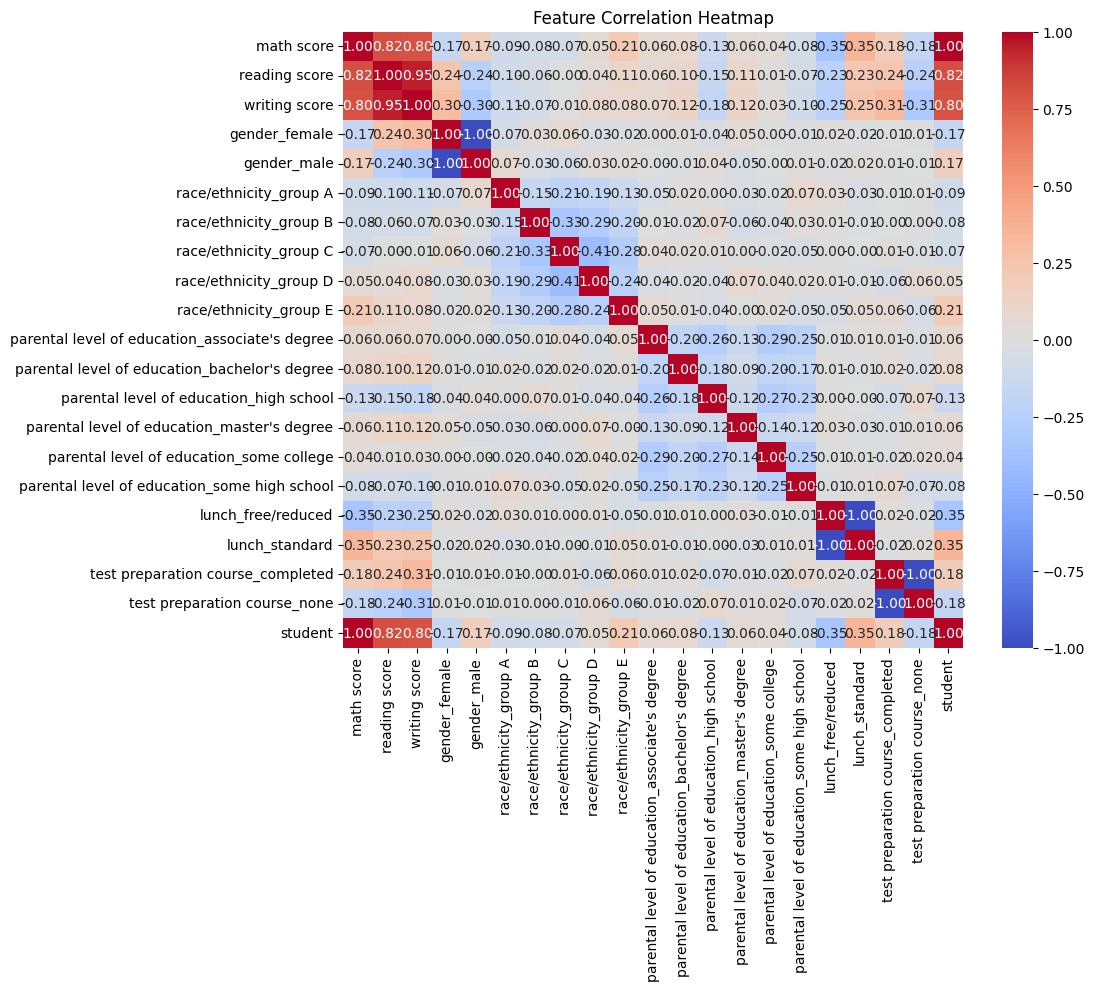

In [72]:
print("\n🧠 Showing correlation heatmap:")
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [73]:
X = data.drop(columns=['student'])
y = data['student']

In [74]:
print("\nSplitting dataset into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Splitting dataset into training and test sets...


In [75]:
print("Scaling features using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling features using StandardScaler...


In [76]:
print("Training Linear Regression model on scaled features...")
model = LinearRegression()
model.fit(X_train_scaled, y_train)

Training Linear Regression model on scaled features...


LinearRegression()

In [77]:
print("Predicting on test data...")
y_pred = model.predict(X_test_scaled)

Predicting on test data...


In [78]:
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score on test data: {r2:.4f}")



R-squared Score on test data: 1.0000


In [79]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

✅ R² Score: 1.0000
✅ Adjusted R² Score: 1.0000
📉 Mean Squared Error (MSE): 0.0000
📉 Mean Absolute Error (MAE): 0.0000
📉 Root Mean Squared Error (RMSE): 0.0000


NameError: name 'housing' is not defined

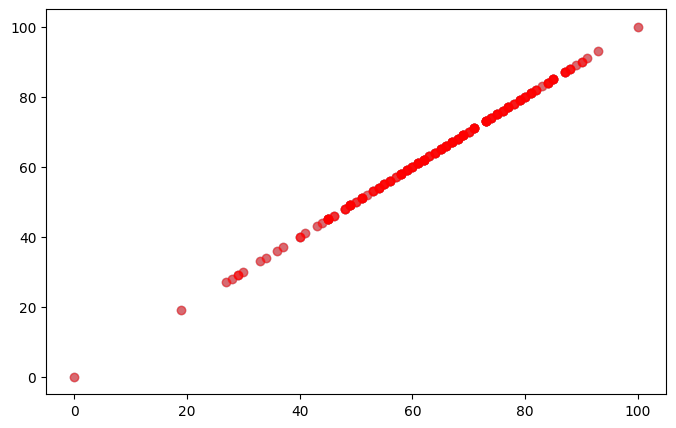

In [80]:
# Step 8: Plotting (visualizing prediction using one feature)
feature_index = 0  # Median Income
X_plot = X_test.iloc[:, feature_index]
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_test, color='lightblue', label='Actual Prices')
plt.scatter(X_plot, y_pred, color='red', alpha=0.5, label='Predicted Prices')
plt.xlabel(housing.feature_names[feature_index])
plt.ylabel('Median House Value (in $100,000s)')
plt.title('Prediction vs Actual (based on Median Income)')
plt.legend()
plt.grid(True)
plt.show()

**Summary:**
**Data Analysis Key Findings**
**Missing Data:**
i found no missing data in it.

**Data Type Issues:**

data types are correct

**Relationships between Variables:**
🔴 Strong Positive Correlations (Close to +1)
Math score vs. Reading score: 0.82

Math score vs. Writing score: 0.80

Reading score vs. Writing score: 0.95 (Strongest positive correlation in the heatmap.

These indicate that students who score well in one subject tend to score well in the others.


🔵 Strong Negative Correlations (Close to -1)
Lunch (free/reduced) vs. Scores:

Math score: -0.35

Reading score: -0.32

Writing score: -0.30
(Students with free/reduced lunch tend to score lower.)

Test preparation course (none) vs. Scores:

Math: -0.18

Reading: -0.24

Writing: -0.31

✅ Summary of Most Influential Factors:
Reading ↔ Writing: Most strongly correlated (0.95)

Lunch type and Test preparation course significantly impact performance.

Gender and Race/Ethnicity have minor influence on scores.

**Data Cleaning Challenges:**
There is no nan or missing valyes or non numeric in numeric data and vice versa. Although i find some outliers and cap it accordingly.

**At the end Model is trained well and R2 score is good**